In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np # Will be needed for isnan check if using apply later

In [2]:
# --- 1. Load the Data ---
# Read the CSV data provided
df = pd.read_csv('new_social_media_data.csv')
# Display the first few rows of the DataFrame to understand its structure
df.head()

,date,platform,Post_Types,Likes,Shares,Comments,Views
0,May-23,Twitter,image,868.0,238.0,352.0,8836.0
1,Feb-23,Twitter,image,944.0,610.0,146.0,5554.0
2,Mar-23,Instagram,image,1067.0,858.0,365.0,4018.0
3,Jun-23,Twitter,text,780.0,427.0,100.0,6999.0
4,Feb-23,Instagram,text,836.0,893.0,443.0,5802.0


In [3]:
f = pd.read_csv(io.StringIO(df.to_csv(index=False)))
# Display the first few rows of the DataFrame to understand its structure

In [4]:
print("--- Initial Data Info ---")
df.info()

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        799 non-null    object 
 1   platform    799 non-null    object 
 2   Post_Types  799 non-null    object 
 3   Likes       795 non-null    float64
 4   Shares      797 non-null    float64
 5   Comments    797 non-null    float64
 6   Views       797 non-null    float64
dtypes: float64(4), object(3)
memory usage: 43.8+ KB


In [5]:
print("\n--- First 5 Rows ---")
print(df.head())



--- First 5 Rows ---
     date   platform Post_Types   Likes  Shares  Comments   Views
0  May-23    Twitter      image   868.0   238.0     352.0  8836.0
1  Feb-23    Twitter      image   944.0   610.0     146.0  5554.0
2  Mar-23  Instagram      image  1067.0   858.0     365.0  4018.0
3  Jun-23    Twitter       text   780.0   427.0     100.0  6999.0
4  Feb-23  Instagram       text   836.0   893.0     443.0  5802.0


In [6]:
print("\n--- Descriptive Statistics ---")
print(df.describe(include='all')) # Include object columns too


--- Descriptive Statistics ---
          date   platform Post_Types        Likes      Shares    Comments  \
count      799        799        799   795.000000  797.000000  797.000000   
unique      13          4          3          NaN         NaN         NaN   
top     Dec-22  Instagram      image          NaN         NaN         NaN   
freq        80        277        299          NaN         NaN         NaN   
mean       NaN        NaN        NaN  1283.893082  497.193225  308.716437   
std        NaN        NaN        NaN   534.248812  230.067246  114.112513   
min        NaN        NaN        NaN     0.000000    0.000000    0.000000   
25%        NaN        NaN        NaN   808.000000  301.000000  211.000000   
50%        NaN        NaN        NaN  1284.000000  501.000000  318.000000   
75%        NaN        NaN        NaN  1773.500000  687.000000  409.000000   
max        NaN        NaN        NaN  2200.000000  900.000000  500.000000   

              Views  
count    797.000000  

In [7]:
df.isna().sum() # Check for missing values in the DataFrame




date          0
platform      0
Post_Types    0
Likes         4
Shares        2
Comments      2
Views         2
dtype: int64

In [8]:
# --- 2. Clean the Data ---

# Convert 'date' to datetime objects (first day of the month)
df['date'] = pd.to_datetime(df['date'], format='%b-%y')

In [9]:

# Check for missing values
print("\n--- Missing Values Before Cleaning ---")
print(df.isnull().sum())


--- Missing Values Before Cleaning ---
date          0
platform      0
Post_Types    0
Likes         4
Shares        2
Comments      2
Views         2
dtype: int64


In [10]:
# Handle Missing Values
# For numeric columns (Likes, Shares, Comments, Views), let's impute with the median
# Median is generally preferred over mean for potentially skewed data like engagement metrics.
numeric_cols = ['Likes', 'Shares', 'Comments', 'Views']
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    # Optional: Convert to integer after filling NaNs
    df[col] = df[col].astype(int)


C:\Users\USER\AppData\Local\Temp\ipykernel_16200\527904876.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_16200\527904876.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [11]:
# Check for missing values again
print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())


--- Missing Values After Cleaning ---
date          0
platform      0
Post_Types    0
Likes         0
Shares        0
Comments      0
Views         0
dtype: int64


In [12]:
# Check unique values in categorical columns
print("\n--- Unique Platforms ---")
print(df['platform'].unique())
# Found 'NEP' - this seems unusual. Let's keep it for now but be aware.


--- Unique Platforms ---
['Twitter' 'Instagram' 'Facebook' 'NEP']


In [13]:

print("\n--- Unique Post Types ---")
print(df['Post_Types'].unique()) # Looks consistent ('image', 'text', 'video')


--- Unique Post Types ---
['image' 'text' 'video']


In [14]:
# Check data types after cleaning
print("\n--- Data Info After Cleaning ---")
df.info()


--- Data Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        799 non-null    datetime64[ns]
 1   platform    799 non-null    object        
 2   Post_Types  799 non-null    object        
 3   Likes       799 non-null    int64         
 4   Shares      799 non-null    int64         
 5   Comments    799 non-null    int64         
 6   Views       799 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 43.8+ KB


In [15]:
# Add derived columns (optional but useful for dashboards)
# Example: Engagement Rate = (Likes + Comments + Shares) / Views
# Handle potential division by zero or very low views leading to inflated rates
df['Total_Engagement'] = df['Likes'] + df['Comments'] + df['Shares']
df['Engagement_Rate'] = df.apply(lambda row: (row['Total_Engagement'] / row['Views']) * 100
                                 if row['Views'] > 10 else 0, # Avoid division by zero/low views
                                 axis=1)


print("\n--- Dataframe with Engagement Metrics (First 5 Rows) ---")
print(df.head())


--- Dataframe with Engagement Metrics (First 5 Rows) ---
        date   platform Post_Types  Likes  Shares  Comments  Views  \
0 2023-05-01    Twitter      image    868     238       352   8836   
1 2023-02-01    Twitter      image    944     610       146   5554   
2 2023-03-01  Instagram      image   1067     858       365   4018   
3 2023-06-01    Twitter       text    780     427       100   6999   
4 2023-02-01  Instagram       text    836     893       443   5802   

   Total_Engagement  Engagement_Rate  
0              1458        16.500679  
1              1700        30.608570  
2              2290        56.993529  
3              1307        18.674096  
4              2172        37.435367  


In [16]:
# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 12)) # Set a larger figure size for multiple plots

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_16200\1968247676.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_views.index, y=platform_views.values, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_16200\1968247676.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=post_type_likes.index, y=post_type_likes.values, palette='magma')
C:\Users\USER\AppData\Local\Temp\ipykernel_16200\1968247676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='Likes', data=df, palette='coolwarm')
C:\Users\USER\AppD

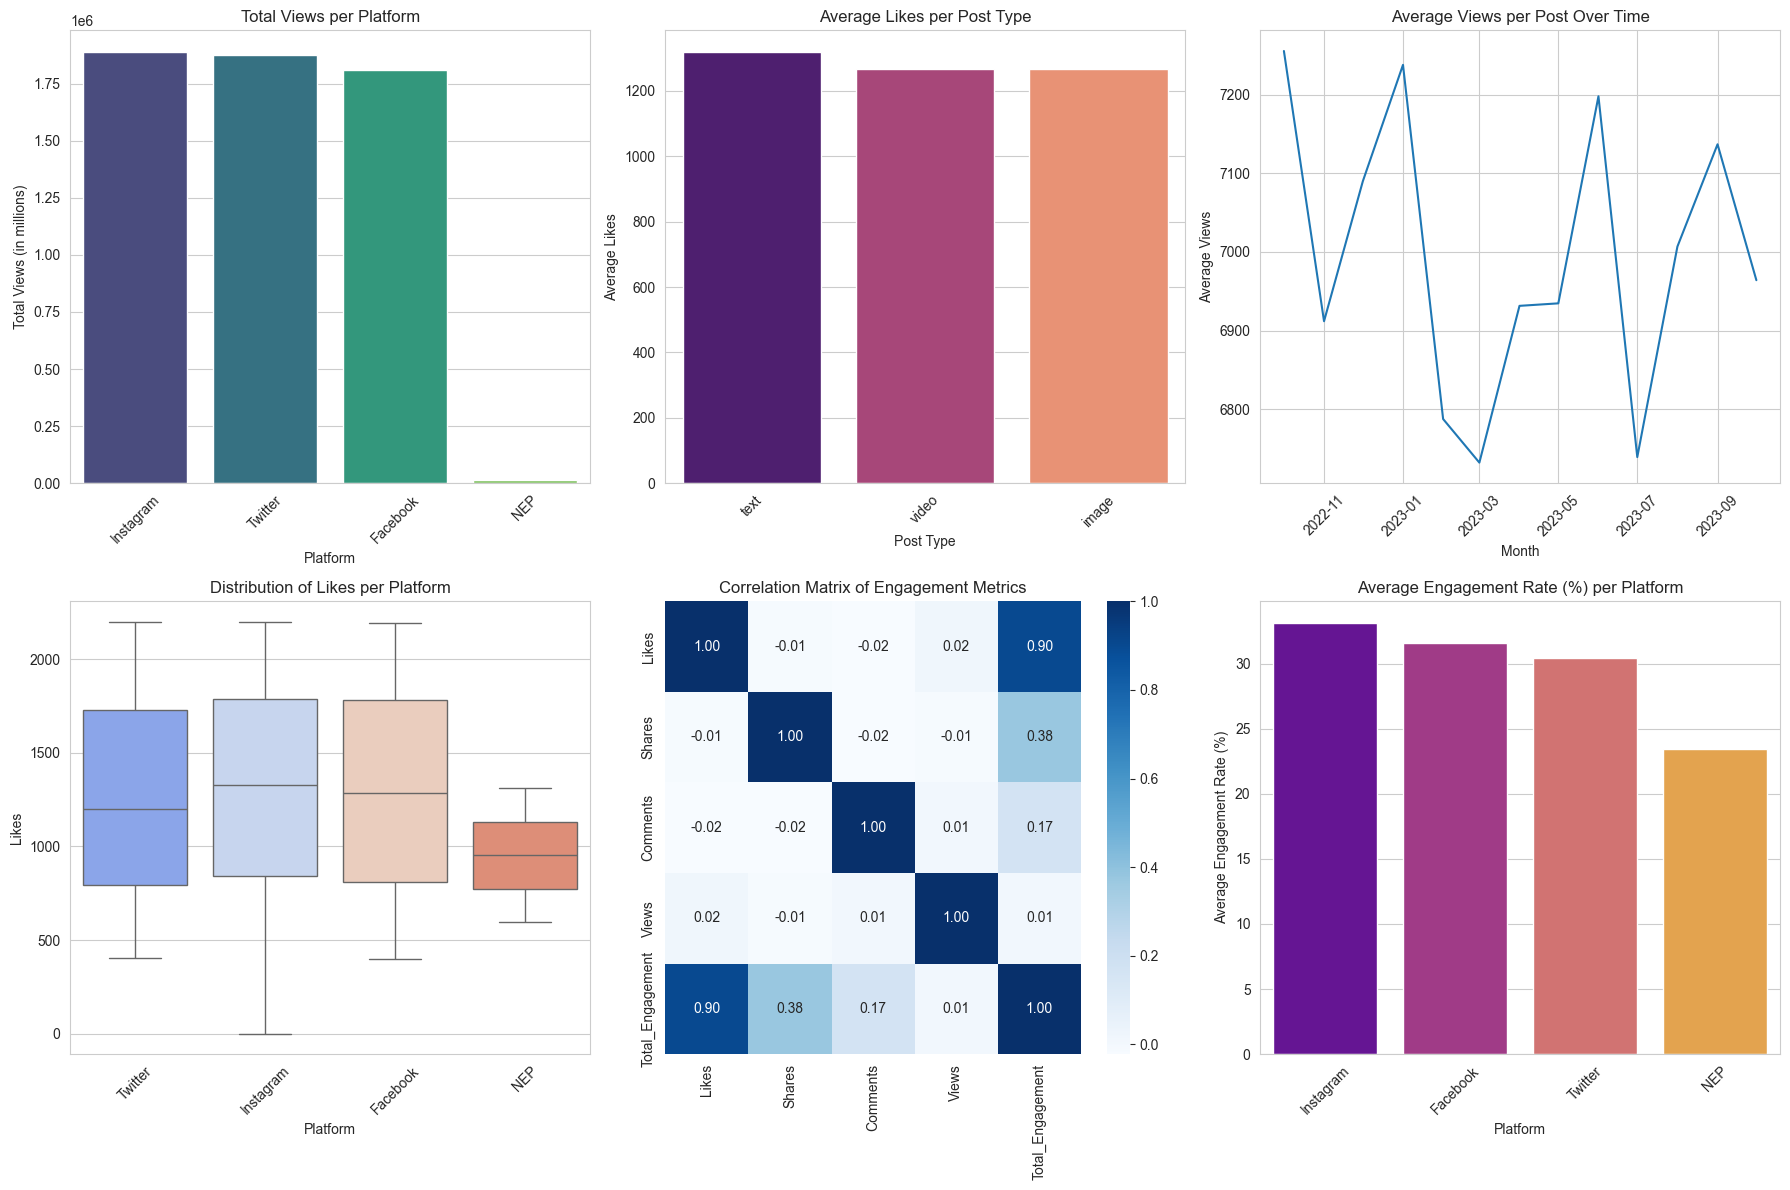

In [17]:
# --- 3. Perform Analysis and Create Plots ---

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 12)) # Set a larger figure size for multiple plots

# Plot 1: Total Views per Platform
plt.subplot(2, 3, 1) # Rows, Columns, Index
platform_views = df.groupby('platform')['Views'].sum().sort_values(ascending=False)
sns.barplot(x=platform_views.index, y=platform_views.values, palette='viridis')
plt.title('Total Views per Platform')
plt.ylabel('Total Views (in millions)')
plt.xlabel('Platform')
# Format y-axis ticks to be more readable (optional)
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x/1e6) + 'M' for x in current_values])
plt.xticks(rotation=45)


# Plot 2: Average Likes per Post Type
plt.subplot(2, 3, 2)
post_type_likes = df.groupby('Post_Types')['Likes'].mean().sort_values(ascending=False)
sns.barplot(x=post_type_likes.index, y=post_type_likes.values, palette='magma')
plt.title('Average Likes per Post Type')
plt.ylabel('Average Likes')
plt.xlabel('Post Type')
plt.xticks(rotation=45)

# Plot 3: Performance Over Time (Average Views per Month)
plt.subplot(2, 3, 3)
# Ensure date is sorted for line plot
df_time = df.sort_values('date')
monthly_views = df_time.groupby(df_time['date'].dt.to_period('M'))['Views'].mean()
# Convert PeriodIndex back to Timestamp for plotting if needed, or plot directly
monthly_views.index = monthly_views.index.to_timestamp()
sns.lineplot(data=monthly_views)
plt.title('Average Views per Post Over Time')
plt.ylabel('Average Views')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Plot 4: Distribution of Likes per Platform
plt.subplot(2, 3, 4)
sns.boxplot(x='platform', y='Likes', data=df, palette='coolwarm')
plt.title('Distribution of Likes per Platform')
plt.ylabel('Likes')
plt.xlabel('Platform')
plt.xticks(rotation=45)

# Plot 5: Correlation Heatmap of Metrics
plt.subplot(2, 3, 5)
# Select only numeric columns for correlation
corr_cols = ['Likes', 'Shares', 'Comments', 'Views', 'Total_Engagement']
correlation_matrix = df[corr_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Engagement Metrics')

# Plot 6: Average Engagement Rate per Platform
plt.subplot(2, 3, 6)
platform_engagement_rate = df.groupby('platform')['Engagement_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=platform_engagement_rate.index, y=platform_engagement_rate.values, palette='plasma')
plt.title('Average Engagement Rate (%) per Platform')
plt.ylabel('Average Engagement Rate (%)')
plt.xlabel('Platform')
plt.xticks(rotation=45)


# Adjust layout and display plots
plt.tight_layout()
plt.show()


In [18]:
# --- 4. Save Cleaned Data to Excel ---
excel_filename = 'cleaned_social_media_data.xlsx'
try:
    df.to_excel(excel_filename, index=False, engine='openpyxl') # Use openpyxl engine
    print(f"\nSuccessfully saved cleaned data to '{excel_filename}'")
except ImportError:
    print("\nError: 'openpyxl' library not found. Please install it to save to Excel:")
    print("pip install openpyxl")
except Exception as e:
    print(f"\nAn error occurred while saving to Excel: {e}")


An error occurred while saving to Excel: [Errno 13] Permission denied: 'cleaned_social_media_data.xlsx'
